In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

# Models
from fbprophet import Prophet
import pmdarima as pm



import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# Reading files

In [2]:
PATH ='data/whole_position.csv'
col_names = {'日期' : 'date', '股票代码' : 'name', '次日vwap卖出收益率' : 'y'}
pd.options.display.max_columns = 130
pd.options.display.max_rows= 130

In [3]:
# excluding leaking features, using cosine distance to compare btw columns
# for c in data.columns:
#     try:
#         dist = 1 - cosine(data.y, data[c])
#         if dist > 0.1:
#             print(f'{c} : {dist}')
#     except:
#         print(c)

# name
# 当日T0收益率 : 0.8270681694546478
# y : 1.0
# 30%成交上限50万盈亏金额 : 0.9160735994602192
# 降权后30%成交上限50万盈亏金额 : 0.883344087636016
# 等权10万盈亏金额 : 0.9999501589440927
# 降权后等权10万盈亏金额 : 0.9531119268421464
        
leak_col = ['当日T0收益率', '30%成交上限50万盈亏金额', '降权后30%成交上限50万盈亏金额', '等权10万盈亏金额', '降权后等权10万盈亏金额']
const_col = ['是否被st', '是否交易']

In [4]:
data  = pd.read_csv(PATH, encoding='gbk')

In [5]:
# rename key functional cols
data.rename(columns=col_names, inplace=True)

# drop features 
data.drop(leak_col, axis=1, inplace=True)
data.drop(const_col, axis=1, inplace=True)

# convert dates to pd.datetime
data.date = pd.to_datetime(data.date, format='%Y%m%d')

In [6]:
data.shape

(875381, 123)

In [7]:
data.head().T

,0,1,2,3,4
date,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00
name,000007.SZ,000018.SZ,000049.SZ,000059.SZ,000099.SZ
昨日净主动买入额,7.66258e+06,-4.3391e+06,6.27191e+06,3.80723e+07,-4.08592e+06
昨日大单净买入额,4.02081e+06,4.07265e+06,-3.12273e+06,6.32995e+06,-1.0569e+07
昨日大单净主动买入额,2.76474e+06,1.14069e+06,1.16375e+06,2.94006e+07,-5.71747e+06
昨日净主动买入额占比,0.0961051,-0.0402137,0.0905643,0.170227,-0.0350641
昨日大单净买入额占比,0.0504295,0.0377442,-0.0450912,0.0283022,-0.0906998
昨日大单净主动买入额占比,0.0346757,0.0105716,0.0168042,0.131455,-0.0490655
前三日净主动买入额,-1.92516e+06,-1.75964e+07,-1.62721e+07,3.71891e+07,-1.77702e+07
前三日大单净买入额,2.82811e+06,-1.81219e+07,-2.57035e+07,-9.71136e+07,-2.09979e+07


# Quick and dirty RF

In [11]:
from sklearn.ensemble import RandomForestRegressor

X = data.copy()

y = data.y
X = X.drop(['y', 'name', 'date'], axis=1)

# filling missing values/NaN
X = X.fillna(-999)

# take out features with infinite values
std = X.describe().loc['std']
drop_features = std[std.isnull()].index.tolist()
X = X.drop(drop_features, axis=1)

# CV split
X_train = X[:int(X.shape[0]*0.7)]
X_test =  X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test =  y[int(X.shape[0]*0.7):]

# # Label encoder
# for c in X.columns[X.dtypes == 'object']:
#     X[c] = X[c].factorize()[0]

In [13]:
from sklearn.ensemble import RandomForestRegressor


In [14]:
rf = RandomForestRegressor()
rf.fit(X, y)

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
rf.score(X_test, y_test)

NameError: name 'rf_feature_importances_' is not defined

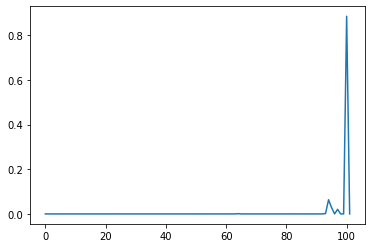

In [16]:
# unsplit rf model
plt.plot(rf.feature_importances_)

In [51]:
(rf.feature_importances_<1e-6).sum()

25

In [26]:
feature_importances = dict(zip(X.columns, rf.feature_importances_))

In [27]:
maximum = max(feature_importances, key=feature_importances.get)
print(maximum, feature_importances[maximum])

降权后等权10万盈亏金额 0.8843995178804338


In [28]:
data.shape

(875381, 129)

In [34]:
for k, v in feature_importances.items():
    if v > 1e-5:
        print(f'{k}: {v}')

前十日大单净买入额: 1.2741477153228245e-05
前二十日净主动买入额: 1.2166710655741331e-05
当日T0收益率: 0.0001151325181117284
前第三日当日涨跌幅: 1.1267794927095702e-05
前三天换手率: 1.1791334743526056e-05
第二阶段成交额(9点24分30秒): 0.0011714515890139685
沪深300昨日主流资金: 1.1959901692179212e-05
沪深300昨日H2: 1.0174060406157403e-05
沪深300昨日机器人: 2.0107451584633493e-05
9点24分30秒价格比昨收: 1.7169216227633496e-05
30%成交上限50万成交金额: 0.0017525386802775466
30%成交上限50万盈亏金额: 0.06347003968896978
每日开仓总金额: 0.028141678534598168
信号降权: 0.02064688786485948
等权10万成交金额: 2.0054793743664096e-05
降权后等权10万盈亏金额: 0.8843995178804338


In [61]:
for k, v in feature_importances.items():
    if v < 1e-6:
        print(f'{k}: {v}')

昨日大单净买入额: 9.216680624451912e-07
前三日大单净主动买入额: 9.026073132825688e-07
前五日大单净主动买入额: 7.7045554634225e-07
前十日大单净主动买入额: 7.870004220271179e-07
除权后开盘价: 4.830244134704311e-07
日线开盘价: 2.131204613268604e-07
除权后昨收: 2.844127650657008e-07
除权后第二日vwap价格: 3.861221258890571e-07
日线昨收: 5.091813608114964e-07
是否被st: 0.0
连续上涨天数: 2.665312343093762e-07
60日均线: 8.061556357456941e-07
是否交易: 0.0
集合竞价成交价: 2.5363466885150604e-07
集合竞价昨收: 4.3900201295852445e-07
9点15分价格: 2.8345970502854015e-07
9点20分价格: 1.9965352093379234e-07
9点24分30秒价格: 3.017620467299407e-07
第一阶段均价(9点15分至于9点20分): 2.792602361263725e-07
第二阶段均价(9点20分至于9点24分30秒): 1.550736274282529e-07
第二阶段最高价(9点20分至于9点24分30秒): 4.852915874562549e-07
第二阶段最低价(9点20分至于9点24分30秒): 3.522617296917466e-07
沪深300昨日总市值: 8.410081614641649e-07
沪深300昨收: 7.142750756159347e-07
dealed_ordered: 3.102127061142574e-07


In [62]:
from scipy.spatial.distance import cosine

for c in data.columns:
    try:
        dist = 1 - cosine(data.y, data[c])
        if dist > 0.1:
            print(f'{c} : {dist}')
    except:
        print(c)

date
name


C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


y : 1.0


In [55]:
X.shape

(875381, 102)

In [57]:
data.y

0        -0.025085
1        -0.029294
2         0.049065
3        -0.016073
4         0.044831
            ...   
875376    0.010051
875377   -0.076550
875378    0.020741
875379   -0.030679
875380   -0.086976
Name: y, Length: 875381, dtype: float64

# 3rd Attempt w/ CV splits

In [8]:
from sklearn.ensemble import RandomForestRegressor

X = data.copy()

y = data.y
X = X.drop(['y', 'name', 'date'], axis=1)

# filling missing values/NaN
X = X.fillna(-999)

# take out features with infinite values
std = X.describe().loc['std']
drop_features = std[std.isnull()].index.tolist()
X = X.drop(drop_features, axis=1)

# CV split
X_train = X[:int(X.shape[0]*0.7)]
X_test =  X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test =  y[int(X.shape[0]*0.7):]

# # Label encoder
# for c in X.columns[X.dtypes == 'object']:
#     X[c] = X[c].factorize()[0]

In [9]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [10]:
rf.score(X_test, y_test)

-0.37073131362702383

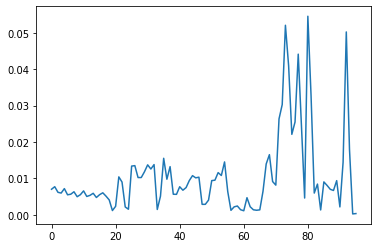

In [12]:
plt.plot(rf.feature_importances_)

In [31]:
(rf.feature_importances_>1e-3).sum()

94

In [20]:
feature_importances = dict(zip(X.columns, rf.feature_importances_))

In [36]:
l = []

In [39]:
l.append('a')

In [40]:
l

['a', 'a']

In [41]:
def importance_plot(dict, ceil=1, floor=0):
    
    k_list = []
    v_list = []
    
    for k, v in dict.items():
        if v > floor:
            if v < ceil:
                k_list.append(k)
                v_list.append(v)
                print(f'{k}: {v}')
        
    return k_list, v_list

In [42]:
k_list, v_list = importance_plot(feature_importances, floor=0.02)

沪深300昨日涨跌幅: 0.02634562057573765
沪深300前两日涨跌幅: 0.030288903135166956
沪深300前三日涨跌幅: 0.0520752288654342
沪深300前五日涨跌幅: 0.04092271330741787
沪深300昨日主流资金: 0.022107076884458433
沪深300昨日H1: 0.025496005041439278
沪深300昨日H2: 0.04413744102056192
沪深300昨日机器人: 0.024501125825499886
沪深300第二阶段涨跌幅: 0.05455487194330503
沪深300第二阶段-H2: 0.03275578188542474
每日开仓总数量: 0.050244141214318506


(array([2., 2., 1., 1., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.02210708, 0.02505688, 0.02800668, 0.03095648, 0.03390628,
        0.03685607, 0.03980587, 0.04275567, 0.04570547, 0.04865527,
        0.05160507, 0.05455487]),
 <a list of 11 Patch objects>)

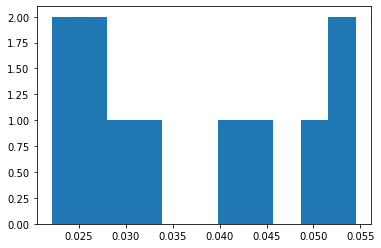

In [47]:
plt.hist(v_list, bins=len(v_list))
# plt.xticks(arange())

In [21]:
for k, v in feature_importances.items():
    if v > 0.02:
        print(f'{k}: {v}')

沪深300昨日涨跌幅: 0.02634562057573765
沪深300前两日涨跌幅: 0.030288903135166956
沪深300前三日涨跌幅: 0.0520752288654342
沪深300前五日涨跌幅: 0.04092271330741787
沪深300昨日主流资金: 0.022107076884458433
沪深300昨日H1: 0.025496005041439278
沪深300昨日H2: 0.04413744102056192
沪深300昨日机器人: 0.024501125825499886
沪深300第二阶段涨跌幅: 0.05455487194330503
沪深300第二阶段-H2: 0.03275578188542474
每日开仓总数量: 0.050244141214318506


In [24]:
for k, v in feature_importances.items():
    if v > 0.015:
        if v < 0.02:
            print(f'{k}: {v}')

70日振幅: 0.015527999220968008
沪深300第二阶段总市值: 0.0165227700854483
信号降权: 0.017940077160738463


In [27]:
for k, v in feature_importances.items():
    if v > 0.0125:
        if v < 0.015:
            print(f'{k}: {v}')

ipo日期: 0.013385276192044862
昨日涨跌幅: 0.013508587673673541
前十日涨跌幅: 0.013725031160266216
前第二日当日涨跌幅: 0.012580405183781843
前第三日当日涨跌幅: 0.013797766286071133
昨市值: 0.013234608175515814
昨日机器人: 0.014528059204784788
沪深300昨日总市值: 0.013973280756858355
每日开仓总金额: 0.014440240201602108


In [29]:
for k, v in feature_importances.items():
    if v > 0.01:
        if v < 0.0125:
            print(f'{k}: {v}')

除权后第二日vwap价格: 0.010422569458175367
前两日涨跌幅: 0.010238644377962377
前三日涨跌幅: 0.010237155232107697
前五日涨跌幅: 0.011817463380256918
之前第1日成交金额比前10天成交金额均值: 0.010758097489209192
之前第2日成交金额比前10天成交金额均值: 0.010154555079954667
之前第3日成交金额比前10天成交金额均值: 0.010337075631407223
60日均线斜率: 0.011592520359782862
昨日非主流资金: 0.010803455417541486


In [34]:
for k, v in feature_importances.items():
    if v < 1e-3:
        print(f'{k}: {v}')

等权10万成交金额: 0.0002444966332527549
dealed_ordered: 0.00033946160146491286


Text(0.5, 0, 'Random Forest Feature Importance')

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cp

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26435 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25442 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site

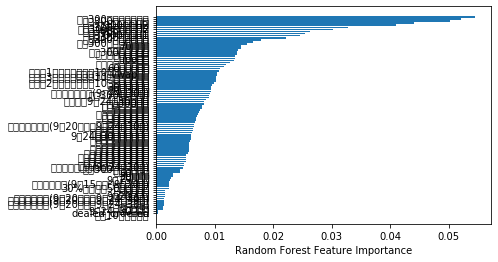

In [35]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# TS for single stock SARIMAX, AUTO_ARIMA and LSTM

In [48]:
stocks = data.name.value_counts()[data.name.value_counts() > 600].index.tolist()

(array([210., 179., 174., 196., 254., 264., 285., 338., 284., 266., 279.,
        224., 189., 163., 132., 140.,  83.,  70.,  57.,  52.,  45.,  34.,
         28.,  25.,  19.,   8.,   7.,   2.,   3.,   2.]),
 array([  1.        ,  25.13333333,  49.26666667,  73.4       ,
         97.53333333, 121.66666667, 145.8       , 169.93333333,
        194.06666667, 218.2       , 242.33333333, 266.46666667,
        290.6       , 314.73333333, 338.86666667, 363.        ,
        387.13333333, 411.26666667, 435.4       , 459.53333333,
        483.66666667, 507.8       , 531.93333333, 556.06666667,
        580.2       , 604.33333333, 628.46666667, 652.6       ,
        676.73333333, 700.86666667, 725.        ]),
 <a list of 30 Patch objects>)

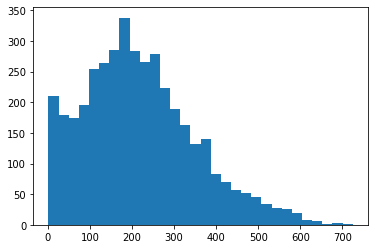

In [53]:
plt.hist(data.name.value_counts(), bins=30)

In [54]:
    X_0 = data.loc[data.name == stocks[0]]

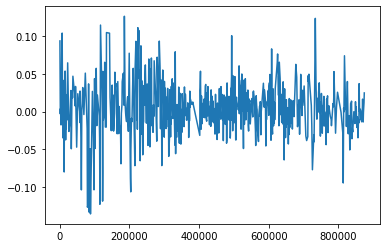

In [55]:
plt.plot(X_0.y)

In [59]:
for c in stocks[:1]:
    print(c)

600547.SH


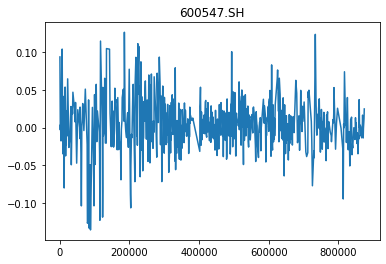

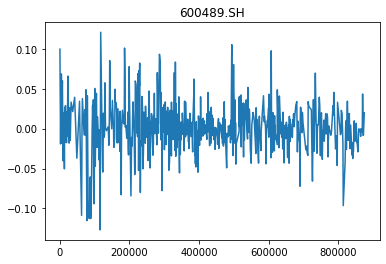

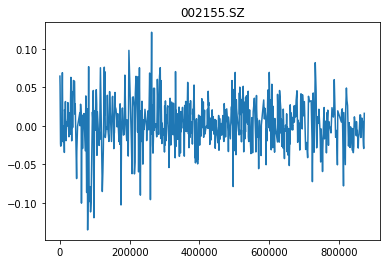

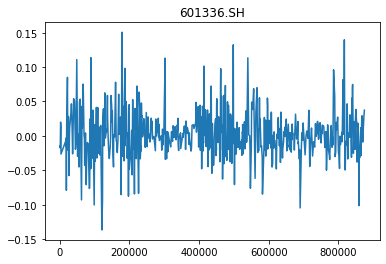

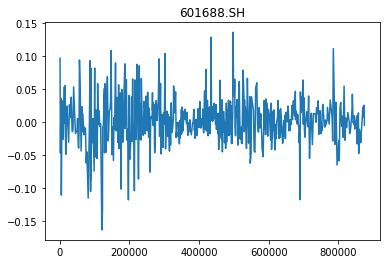

In [62]:
pd.plotting.register_matplotlib_converters()
# matplotlib.rcParams['figure.figsize'] = 18, 8

for c in stocks[:5]:
    plt.figure()
    plt.title(c)
    
    X_0 = data.loc[data.name == c]
    plt.plot(X_0.y)

In [72]:
X_0.head(30)

,date,name,昨日净主动买入额,昨日大单净买入额,昨日大单净主动买入额,昨日净主动买入额占比,昨日大单净买入额占比,昨日大单净主动买入额占比,前三日净主动买入额,前三日大单净买入额,前三日大单净主动买入额,前三日净主动买入额占比,前三日大单净买入额占比,前三日大单净主动买入额占比,前五日净主动买入额,前五日大单净买入额,前五日大单净主动买入额,前五日净主动买入额占比,前五日大单净买入额占比,前五日大单净主动买入额占比,前十日净主动买入额,前十日大单净买入额,前十日大单净主动买入额,前十日净主动买入额占比,前十日大单净买入额占比,前十日大单净主动买入额占比,前二十日净主动买入额,前二十日大单净买入额,前二十日大单净主动买入额,前二十日净主动买入额占比,前二十日大单净买入额占比,前二十日大单净主动买入额占比,前三十日净主动买入额,前三十日大单净买入额,前三十日大单净主动买入额,前三十日净主动买入额占比,前三十日大单净买入额占比,前三十日大单净主动买入额占比,除权后开盘价,日线开盘价,除权后昨收,除权后第二日vwap价格,开盘价涨跌幅,y,除权后收盘价,日线昨收,ipo日期,昨日涨跌幅,前两日涨跌幅,前三日涨跌幅,前五日涨跌幅,前十日涨跌幅,前第二日当日涨跌幅,前第三日当日涨跌幅,连续上涨天数,连续上涨幅度,70日振幅,当日除权因子,昨市值,前三天成交额,前三天成交额排名,前三天换手率,前五天换手率,前十天换手率,前二十天换手率,之前第1日成交金额比前10天成交金额均值,之前第2日成交金额比前10天成交金额均值,之前第3日成交金额比前10天成交金额均值,20日均线,30日均线,60日均线,20日均线斜率,30日均线斜率,60日均线斜率,昨日非主流资金,昨日机器人,集合竞价成交额,集合竞价成交价,集合竞价昨收,9点15分价格,9点20分价格,9点24分30秒价格,第二阶段成交额(9点24分30秒),第一阶段均价(9点15分至于9点20分),第二阶段均价(9点20分至于9点24分30秒),第二阶段最高价(9点20分至于9点24分30秒),第二阶段最低价(9点20分至于9点24分30秒),第二阶段波动率(9点20分至于9点24分30秒),沪深300昨日总市值,沪深300第二阶段总市值,沪深300集合竞价总市值,沪深300真实开盘价,沪深300昨收,沪深300昨日涨跌幅,沪深300前两日涨跌幅,沪深300前三日涨跌幅,沪深300前五日涨跌幅,沪深300昨日主流资金,沪深300昨日H1,沪深300昨日H2,沪深300昨日机器人,沪深300第二阶段价格,沪深300集合竞价价格,沪深300第二阶段涨跌幅,沪深300集合竞价涨跌幅,沪深300第二阶段-H2,沪深300拟合开盘价与真实开盘价涨跌幅差,9点24分30秒价格比昨收,开盘价比9点24分30秒价格,下单价格,第一阶段涨幅,第二阶段涨幅,第二阶段最高涨幅,第二阶段最低涨幅,第二阶段波动率,两阶段总涨幅,第二阶段换手率(9点24分30秒),30%成交上限50万成交金额,每日开仓总金额,每日开仓总数量,信号降权,等权10万成交金额,dealed_ordered
1116,2015-01-06,601688.SH,4.181947e+08,10903093.0,2.152993e+08,0.069836,0.001821,0.035954,2.177517e+09,2.006728e+08,1.784761e+09,0.114767,0.010577,0.094067,3.565291e+09,2.683208e+08,2.943056e+09,0.099451,0.007485,0.082094,4.348633e+09,5.746309e+07,3.500712e+09,0.067548,0.000893,0.054377,6.665706e+09,-2.497490e+09,4.532498e+09,0.039055,-0.014633,0.026557,8.166790e+09,-1.944145e+09,6.075815e+09,0.040102,-0.009547,0.029835,21.75,24.39,21.91,23.89,-0.007303,0.097091,21.91,24.57,1179.0,0.004125,0.032030,0.024310,0.076130,0.074020,0.027791,-0.007480,2.0,0.032030,1.286094,0.891831,1.375920e+11,1.897338e+10,12.0,0.139569,0.262359,0.487788,1.283662,0.930162,1.043919,0.973086,21.0040,18.938667,14.181833,0.0900,0.354000,0.230667,73.774789,8.811661,36680755.0,24.39,24.57,24.57,24.57,24.39,3.579052e+07,24.531875,24.529107,24.57,24.39,6.623036e-02,2.107178e+13,2.093905e+13,2.093040e+13,3608.428,3641.541,0.030516,0.053213,0.053853,0.091779,96.841299,3465.657172,3207.860671,7.079324,3618.602287,3617.108508,-0.629918,-0.670938,410.741615,0.238375,-0.007326,0.000000,24.444,0.000000,-0.007326,0.000000,-0.007326,-0.997304,-0.007326,0.000260,500000.0,4.004841e+08,2296,0.998791,100000.0,1
2164,2015-01-08,601688.SH,1.403962e+09,904457548.0,1.666416e+09,0.111772,0.072005,0.132666,2.225283e+09,1.052659e+09,2.239735e+09,0.089914,0.042533,0.090498,3.984605e+09,1.242428e+09,3.809197e+09,0.105597,0.032926,0.100948,5.827822e+09,1.262098e+09,5.341880e+09,0.080774,0.017493,0.074039,8.467229e+09,-4.459556e+08,6.967172e+09,0.051868,-0.002732,0.042679,1.008990e+10,-8.614743e+08,8.204572e+09,0.045366,-0.003873,0.036890,23.81,26.70,23.98,22.73,-0.007089,-0.046659,23.98,26.89,1181.0,0.082619,0.094477,0.098992,0.121085,0.200200,0.010954,0.004125,4.0,0.129534,1.286094,0.891831,1.505840e+11,2.474908e+10,6.0,0.171507,0.267554,0.528715,1.228756,1.740967,0.859307,0.829975,21.0275,19.723667,14.684000,0.0220,0.423000,0.267000,82.131714,9.306937,90376830.0,26.70,26.89,27.37,27.37,26.70,9.037683e+07,27.370000,27.149655,27.37,26.70,2.374866e-01,2.118384e+13,2.116937e+13,2.116942e+13,3650.073,3643.790,0.000750,0.000618,0.031153,0.054504,96.602602,3535.558610,3264.642421,7.435011,3641.301598,3641.310278,-0.068292,-0.068053,376.659177,-0.240484,-0.007066,0.000000,26.757,0.000000,-0.024479,0.017851,-0.007066,-0.991168,-0.024479,0.000600,500000.0,3.024196e+08,2298,1.000000,100000.0,1
2748,2015-01-09,601688.SH,-1.014681e+09,-887367668.0,-1.227361e+09,-0.114836,-0.100428,-0.138906,7.924071e+08,1.543878e+08,7.970749e+08,0.028714,0.005594,0.028883,2.254649e+09,3.897315e+08,1.976460e+09,0.055939,0.009669,0.049037,4.141909e+09,1.492293e+08,3.475007e+09,0.055765,0.002009,0.046786,7.679122e

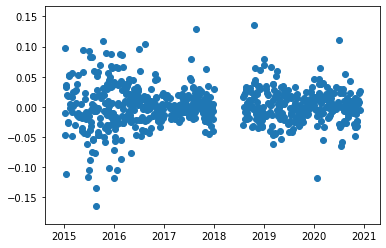

In [75]:
plt.scatter(X_0.date, X_0.y)

In [64]:
data.date.value_counts()

2020-03-13    3123
2020-02-25    2873
2020-02-28    2809
2020-03-10    2767
2019-03-08    2715
              ... 
2016-02-22      69
2018-12-03      65
2015-07-08      44
2015-10-08      14
2015-07-06      12
Name: date, Length: 1293, dtype: int64

In [67]:
data[data.date == '2020-03-13']

,date,name,昨日净主动买入额,昨日大单净买入额,昨日大单净主动买入额,昨日净主动买入额占比,昨日大单净买入额占比,昨日大单净主动买入额占比,前三日净主动买入额,前三日大单净买入额,前三日大单净主动买入额,前三日净主动买入额占比,前三日大单净买入额占比,前三日大单净主动买入额占比,前五日净主动买入额,前五日大单净买入额,前五日大单净主动买入额,前五日净主动买入额占比,前五日大单净买入额占比,前五日大单净主动买入额占比,前十日净主动买入额,前十日大单净买入额,前十日大单净主动买入额,前十日净主动买入额占比,前十日大单净买入额占比,前十日大单净主动买入额占比,前二十日净主动买入额,前二十日大单净买入额,前二十日大单净主动买入额,前二十日净主动买入额占比,前二十日大单净买入额占比,前二十日大单净主动买入额占比,前三十日净主动买入额,前三十日大单净买入额,前三十日大单净主动买入额,前三十日净主动买入额占比,前三十日大单净买入额占比,前三十日大单净主动买入额占比,除权后开盘价,日线开盘价,除权后昨收,除权后第二日vwap价格,开盘价涨跌幅,y,除权后收盘价,日线昨收,ipo日期,昨日涨跌幅,前两日涨跌幅,前三日涨跌幅,前五日涨跌幅,前十日涨跌幅,前第二日当日涨跌幅,前第三日当日涨跌幅,连续上涨天数,连续上涨幅度,70日振幅,当日除权因子,昨市值,前三天成交额,前三天成交额排名,前三天换手率,前五天换手率,前十天换手率,前二十天换手率,之前第1日成交金额比前10天成交金额均值,之前第2日成交金额比前10天成交金额均值,之前第3日成交金额比前10天成交金额均值,20日均线,30日均线,60日均线,20日均线斜率,30日均线斜率,60日均线斜率,昨日非主流资金,昨日机器人,集合竞价成交额,集合竞价成交价,集合竞价昨收,9点15分价格,9点20分价格,9点24分30秒价格,第二阶段成交额(9点24分30秒),第一阶段均价(9点15分至于9点20分),第二阶段均价(9点20分至于9点24分30秒),第二阶段最高价(9点20分至于9点24分30秒),第二阶段最低价(9点20分至于9点24分30秒),第二阶段波动率(9点20分至于9点24分30秒),沪深300昨日总市值,沪深300第二阶段总市值,沪深300集合竞价总市值,沪深300真实开盘价,沪深300昨收,沪深300昨日涨跌幅,沪深300前两日涨跌幅,沪深300前三日涨跌幅,沪深300前五日涨跌幅,沪深300昨日主流资金,沪深300昨日H1,沪深300昨日H2,沪深300昨日机器人,沪深300第二阶段价格,沪深300集合竞价价格,沪深300第二阶段涨跌幅,沪深300集合竞价涨跌幅,沪深300第二阶段-H2,沪深300拟合开盘价与真实开盘价涨跌幅差,9点24分30秒价格比昨收,开盘价比9点24分30秒价格,下单价格,第一阶段涨幅,第二阶段涨幅,第二阶段最高涨幅,第二阶段最低涨幅,第二阶段波动率,两阶段总涨幅,第二阶段换手率(9点24分30秒),30%成交上限50万成交金额,每日开仓总金额,每日开仓总数量,信号降权,等权10万成交金额,dealed_ordered
726115,2020-03-13,000001.SZ,-107215329.0,1115115.0,-31093709.0,-0.074073,0.000770,-0.021482,-24829069.0,-36377433.0,-84137207.0,-0.005698,-0.008348,-0.019307,-1.227718e+09,-991309127.0,-1.297605e+09,-0.142149,-0.114777,-0.150240,-1.623122e+09,-1.296908e+09,-1.618413e+09,-0.084329,-0.067380,-0.084084,-1.437374e+09,-1.997854e+09,-1.898356e+09,-0.038995,-0.054200,-0.051501,-2.679413e+09,-2.751610e+09,-2.822907e+09,-0.047369,-0.048645,-0.049905,13.66,13.90,14.43,13.81,-0.053361,0.009681,14.43,14.68,7073.0,-0.000693,-0.005513,0.015482,-0.046266,-0.028283,-0.004824,0.021112,0.0,0.000000,0.197192,0.983077,2.848764e+11,4.357772e+09,98.0,0.015262,0.030266,0.066871,0.126445,0.752008,0.624104,0.887946,14.7505,14.645667,15.426833,0.0015,-0.046333,-0.010667,26.136137,-1.802740,45110073.0,13.90,14.68,14.46,14.27,13.90,43258607.00,14.342727,14.128437,14.27,13.90,0.131225,2.807672e+13,2.693653e+13,2.692627e+13,3771.0139,3950.9111,-0.019243,-0.032287,-0.011564,-0.060811,62.695807,4045.942578,4061.085018,-0.383265,3790.465005,3789.021582,-4.06099,-4.097524,-270.620013,0.455786,-0.053134,0.000000,14.134,-0.013140,-0.025929,-0.027929,-0.053134,-0.991061,-0.038728,0.000152,500000.000,1.291654e+09,3649,0.30968,100000.00,1
726116,2020-03-13,000002.SZ,-47197793.0,-13721253.0,57586342.0,-0.026570,-0.007724,0.032418,192115777.0,-373738232.0,165613695.0,0.032765,-0.063740,0.028245,-8.531924e+07,-768744654.0,-2.229093e+08,-0.008073,-0.072743,-0.021093,1.825684e+09,4.047628e+08,1.724044e+09,0.066092,0.014653,0.062413,1.725418e+09,-4.963053e+08,1.838097e+09,0.029983,-0.008624,0.031941,2.029175e+09,-8.010585e+08,1.939017e+09,0.024605,-0.009713,0.023512,27.48,28.50,28.88,27.86,-0.048476,0.012528,28.88,29.95,7117.0,-0.014334,-0.027609,-0.019688,-0.072873,0.009437,-0.013468,0.008147,0.0,0.000000,0.203027,0.964336,2.909693e+11,5.863502e+09,53.0,0.019844,0.035561,0.091761,0.195066,0.643074,0.625743,0.853848,29.2615,28.605667,29.114500,0.0000,-0.005333,0.033000,63.803548,1.232521,37597200.0,28.50,29.95,29.45,28.81,28.51,36076554.00,29.052121,28.756875,28.81,28.51,0.089962,2.807672e+13,2.693653e+13,2.692627e+13,3771.0139,3950.9111,-0.019243,-0.032287,-0.011564,-0.060811,62.695807,4045.942578,4061.085018,-0.383265,3790.465005,3789.021582,-4.06099,-4.097524,-270.620013,0.455786,-0.048080,-0.000351,28.942,-0.021732,-0.010413,-0.038063,-0.048080,-0.996996,-0.031919,0.000124,500000.000,1.291654e+09,3649,0.30968,100000.00,1
726117,2020-03-13,000004.SZ,-20620289.0,-16210975.0,-14143818.0,-0.085268,-0.067035,-0.058487,-49943770.0,-6487969.0,-31668183.0,-0.054155,-0.007035,-0.034339,-1.120198e+08,-25404038.0,-6.073545e+07,-0.062176,-0.014100,-0.033711,-4.932806e+08,-7.235219e

### Preprocessing 

In [77]:
from fbprophet import Prophet

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import AutoregressionAD
from adtk.transformer import RollingAggregate

In [102]:
X_0 = data.loc[data.name == stocks[0]]
X_0.set_index(X_0.date, inplace=True)

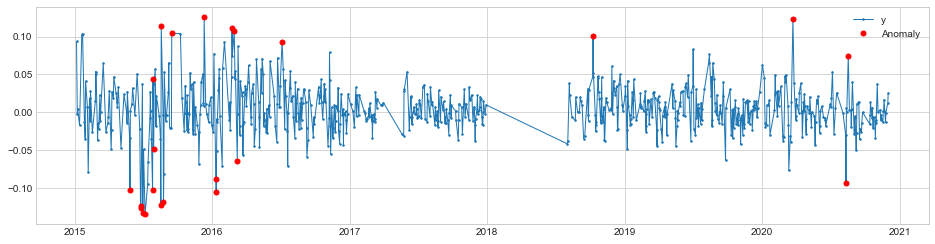

In [112]:
s_train = validate_series(X_0.loc[:, 'y'])

quantile_ad = AutoregressionAD(n_steps=12, step_size=1, c=2.0)
anomalies = quantile_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
# target_data[anomalies == 1] = np.nan
# target_data.interpolate(inplace = True)

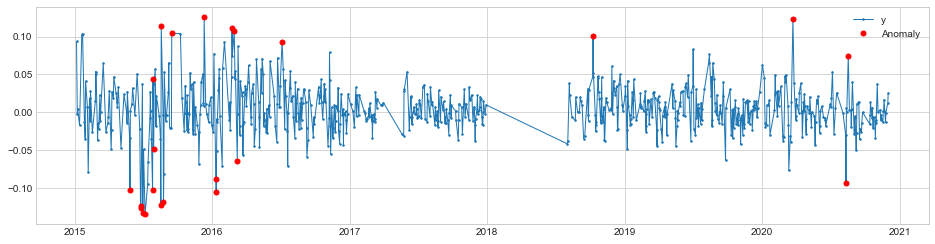

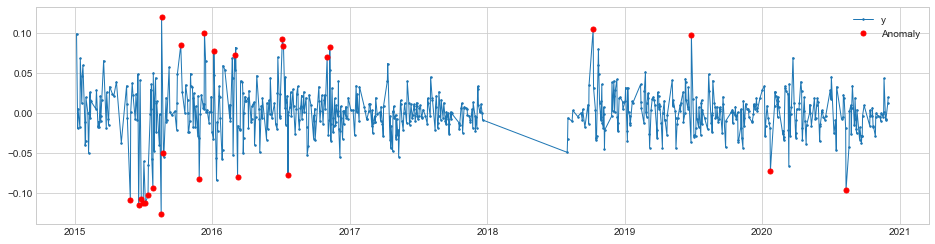

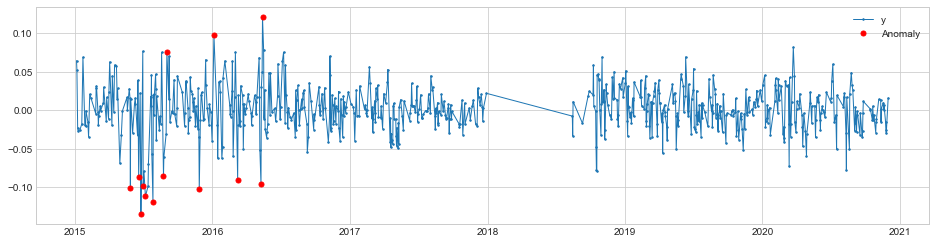

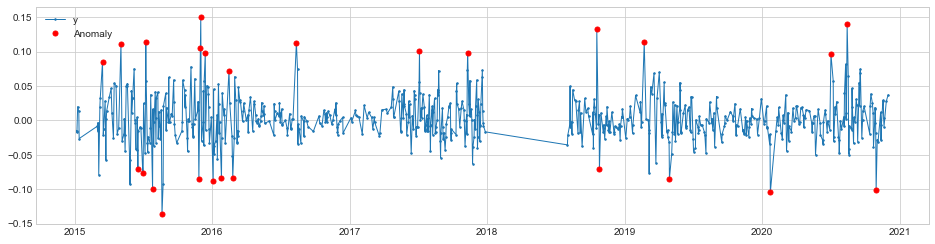

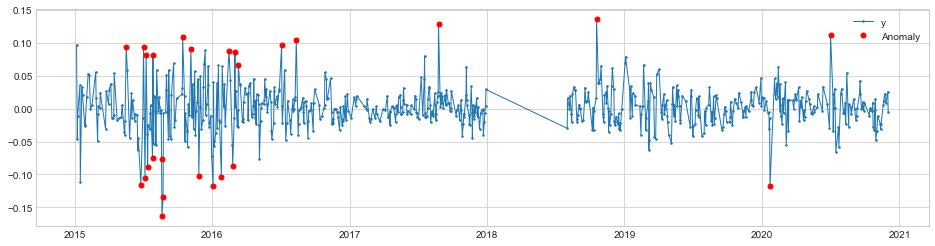

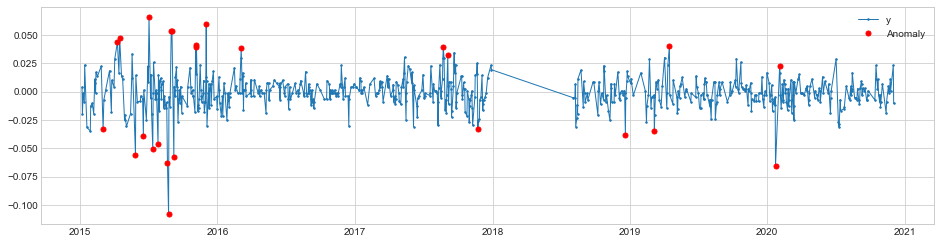

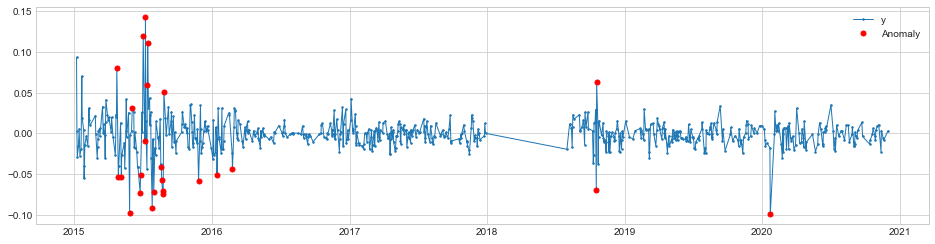

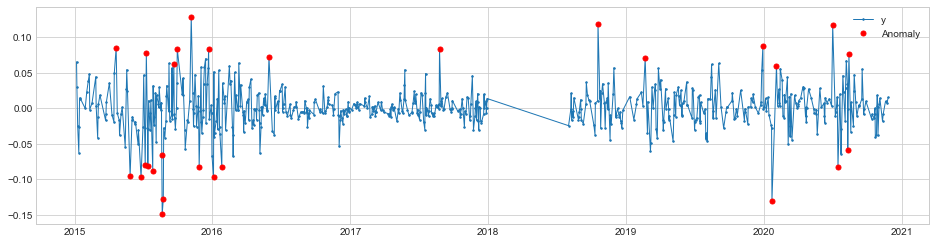

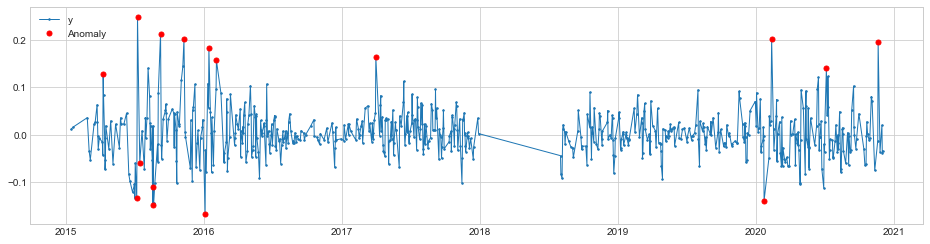

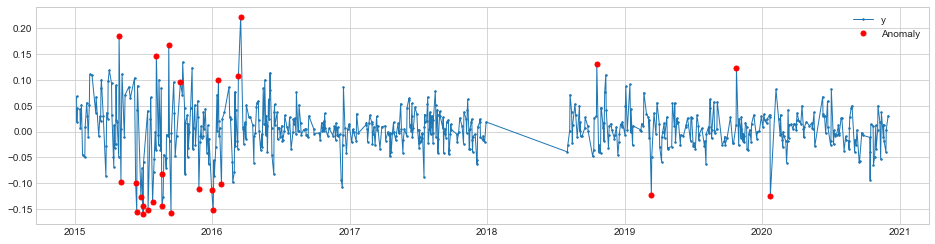

In [115]:
for i in range(10):
    X_0 = data.loc[data.name == stocks[i]]
    X_0.set_index(X_0.date, inplace=True)
    
    s_train = validate_series(X_0.loc[:, 'y'])

    quantile_ad = AutoregressionAD(n_steps=12, step_size=1, c=2.0)
    anomalies = quantile_ad.fit_detect(s_train)
    plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

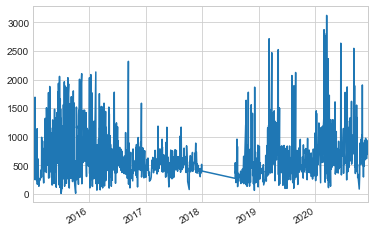

In [132]:
# date distribution
data.date.value_counts().sort_values().plot.line()

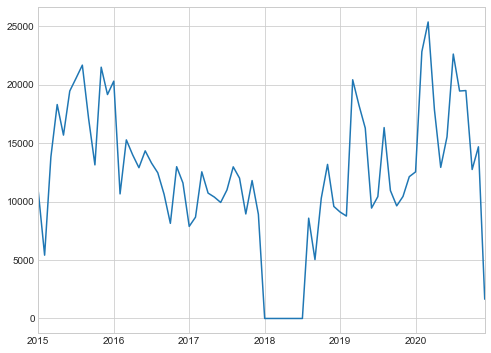

In [152]:
data.date.value_counts().resample('m').sum().plot.line(figsize=(8,6))

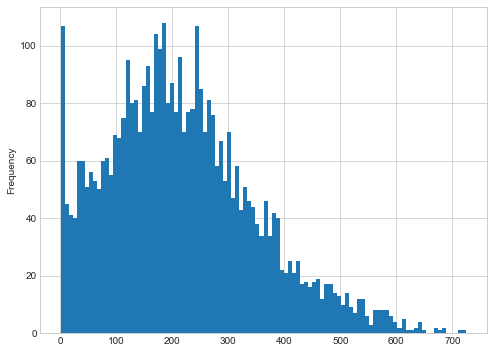

In [153]:
# total number of data points for each stock distribution
data.groupby('name')['date'].nunique().plot.hist(bins=100,figsize=(8, 6))

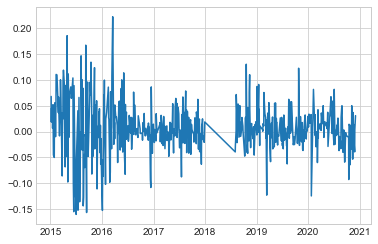

In [155]:
plt.plot(X_0.y)

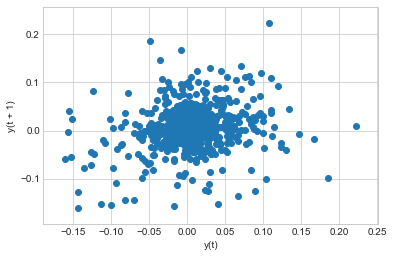

In [154]:
#lagged correlation
pd.plotting.lag_plot(X_0.y)

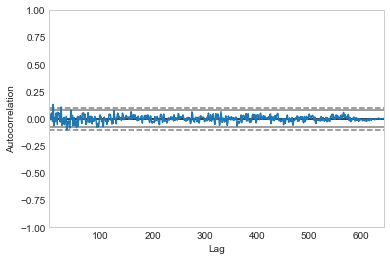

In [158]:
pd.plotting.autocorrelation_plot(X_0.y)

0 : 沪深300昨日涨跌幅
1 : 沪深300前两日涨跌幅
2 : 沪深300前三日涨跌幅
3 : 沪深300前五日涨跌幅
4 : 沪深300昨日主流资金
5 : 沪深300昨日H1
6 : 沪深300昨日H2
7 : 沪深300昨日机器人
8 : 沪深300第二阶段涨跌幅
9 : 沪深300第二阶段-H2
10 : 每日开仓总数量


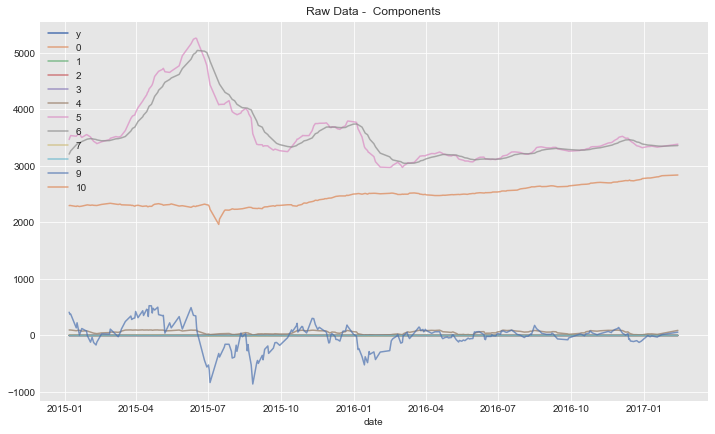

In [170]:
plt.rcParams['figure.figsize'] = [12, 7]
fig, ax = plt.subplots()

sns.lineplot(x='date', y='y', label='y', data=X_0[:int(len(X_0)*0.4)], ax=ax)

for c, k in enumerate(k_list):
    print(f'{c} : {k}')
    sns.lineplot(x='date', y=k, label=c, data=X_0[:int(len(X_0)*0.4)], alpha=0.7, ax=ax)

ax.legend(loc='upper left')
ax.set(title='Raw Data -  Components', xlabel='date', ylabel='');

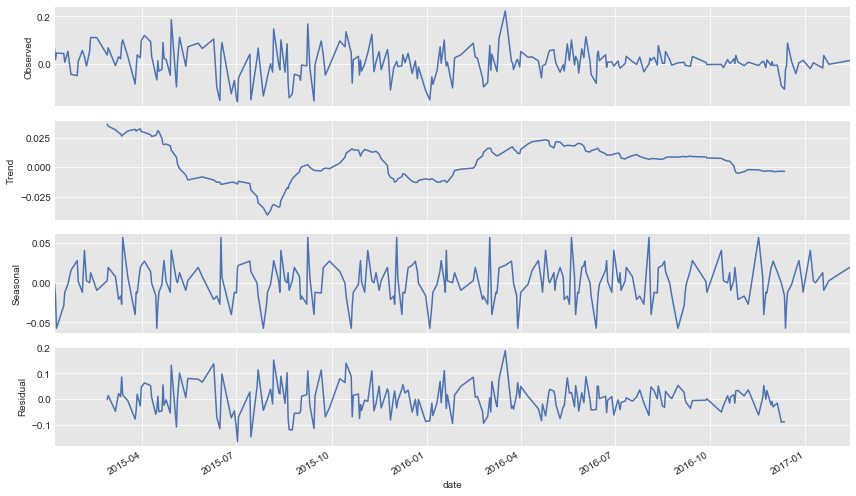

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose 
result = seasonal_decompose(X_0[:int(len(X_0)*0.4)].y, model='additive', freq=30)

# Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()#.suptitle('')
plt.show()

In [256]:
from sklearn.ensemble import IsolationForest

def outlier_smoothing(X, contamination=0.15, smoothing_window=4, plot=True, random_state=22, verbose=True):
    """
    Outlier identification by IForest and 
    smoothing by rolling window median value
    """
    X_rolling_median = X.rolling(smoothing_window).median()
    X_rolling_mean = X.rolling(smoothing_window).mean()
    X_smoothing_ratio = X / X_rolling_median

    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(X.index, X, label='original')
        plt.plot(X.index, X_rolling_median, label='rolling median')
        plt.title("Original vs. Rolling Median")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,10))
        plt.plot(X.index, X_smoothing_ratio, label="original:smoothing ratio")
        plt.title("Smoothing Ratio")
        plt.legend()
        plt.show()
    
    ## Find the outliers
    iso_forest = IsolationForest(contamination=contamination,\
        random_state=random_state)
    peaks = np.where(iso_forest.fit_predict(X_smoothing_ratio[smoothing_window-1:].\
        values.reshape(-1,1))<1)
    if verbose:
        print("Outliers found at ", X.index[peaks[0]+smoothing_window-1])
    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(X.index, X, label='original')
        plt.plot(X.index.values[peaks[0]+smoothing_window-1],\
            X.values[peaks[0]+smoothing_window-1], 'x'
            )
        plt.title("Outlier Finders")
        plt.legend()
        plt.show()
    ## Change the outliers with corresponding smoothed values    
    X_smoothed = X.copy()

    for i in range(len(X)):
        if np.any(peaks[0]+smoothing_window-1==i):
            X_smoothed[i] = X_rolling_mean[i]

    if plot:
        plt.figure(figsize=(10,10))
        plt.plot(X.index, X, label='original')
        plt.plot(X.index, X_smoothed, label='smoothed')
        plt.title("Original vs. smoothed")
        plt.legend()
        plt.show()
    
    return X_smoothed


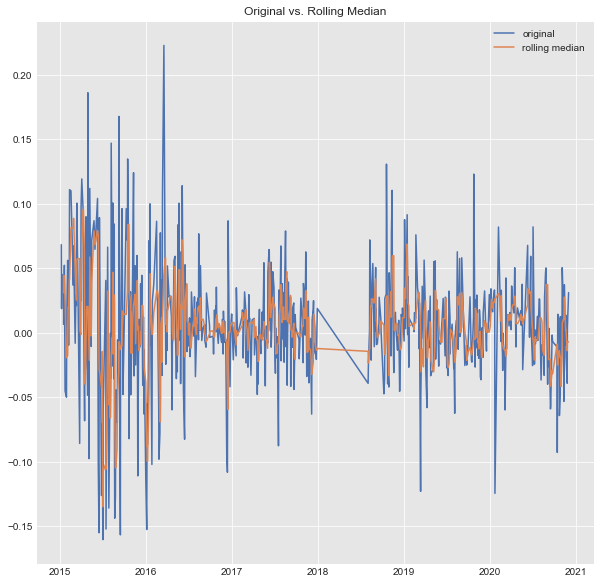

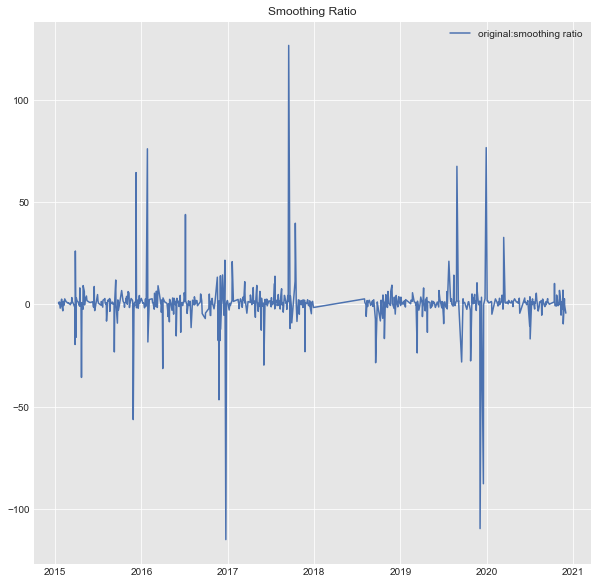

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



Outliers found at  DatetimeIndex(['2015-03-26', '2015-03-27', '2015-03-30', '2015-04-15',
               '2015-04-21', '2015-04-22', '2015-04-29', '2015-05-04',
               '2015-06-15', '2015-08-06', '2015-09-08', '2015-09-14',
               '2015-09-21', '2015-10-09', '2015-11-27', '2015-12-09',
               '2016-01-26', '2016-01-28', '2016-03-04', '2016-03-11',
               '2016-03-31', '2016-04-22', '2016-04-28', '2016-05-27',
               '2016-06-15', '2016-07-05', '2016-07-29', '2016-09-27',
               '2016-10-18', '2016-10-20', '2016-11-17', '2016-11-21',
               '2016-11-24', '2016-11-29', '2016-11-30', '2016-12-01',
               '2016-12-09', '2016-12-15', '2016-12-19', '2016-12-23',
               '2017-01-19', '2017-03-13', '2017-04-18', '2017-04-27',
               '2017-05-03', '2017-05-16', '2017-05-22', '2017-06-02',
               '2017-07-17', '2017-07-19', '2017-08-16', '2017-09-15',
               '2017-09-21', '2017-09-28', '2017-10-12', '

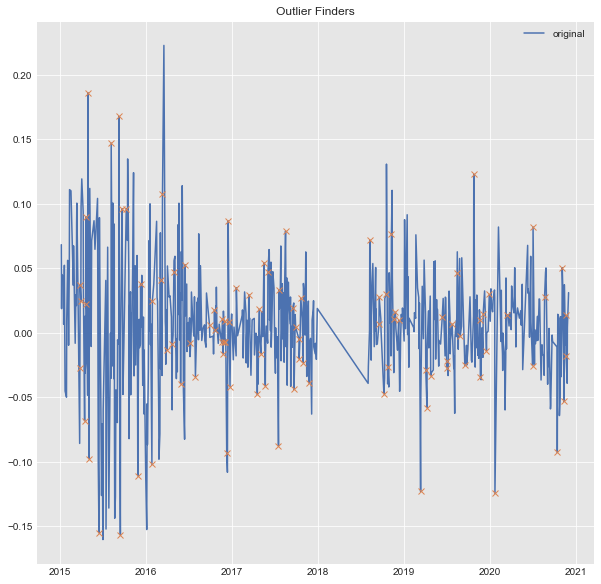

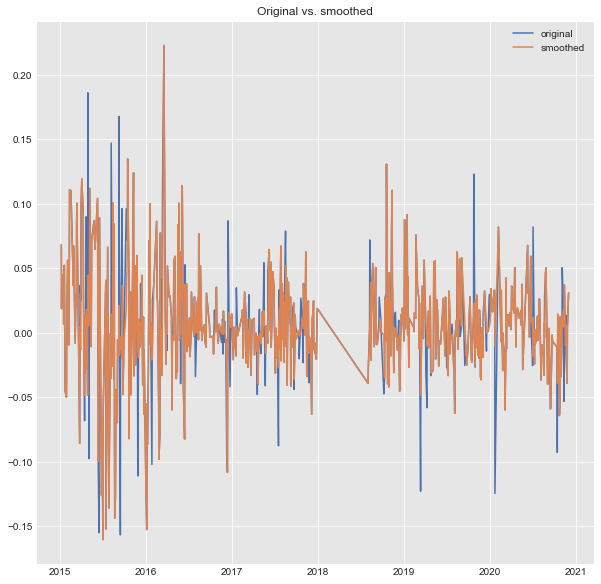

date
2015-01-06    0.068144
2015-01-07    0.018540
2015-01-08    0.045085
2015-01-15    0.042966
2015-01-16    0.006474
                ...   
2020-11-19   -0.003109
2020-11-20    0.005615
2020-11-25   -0.039303
2020-11-26    0.003975
2020-12-01    0.030973
Name: y, Length: 643, dtype: float64

In [257]:
outlier_smoothing(X_0.y)

### Fitting TS models

In [223]:
# Train/test split
X_0_train = X_0.iloc[:int(len(X_0)*0.9), ]
X_0_test = X_0.iloc[int(len(X_0)*0.9):, ]

#### Prophet

In [188]:
# Prophet
prophet_df = pd.DataFrame()
prophet_df['y'] = X_0_train.y.dropna().tolist()
prophet_df['ds'] = X_0_train.index.tolist()

In [190]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(prophet_df)

In [226]:
future = pd.DataFrame()
future['ds'] = X_0_test.index

In [227]:
forecast = m.predict(future)

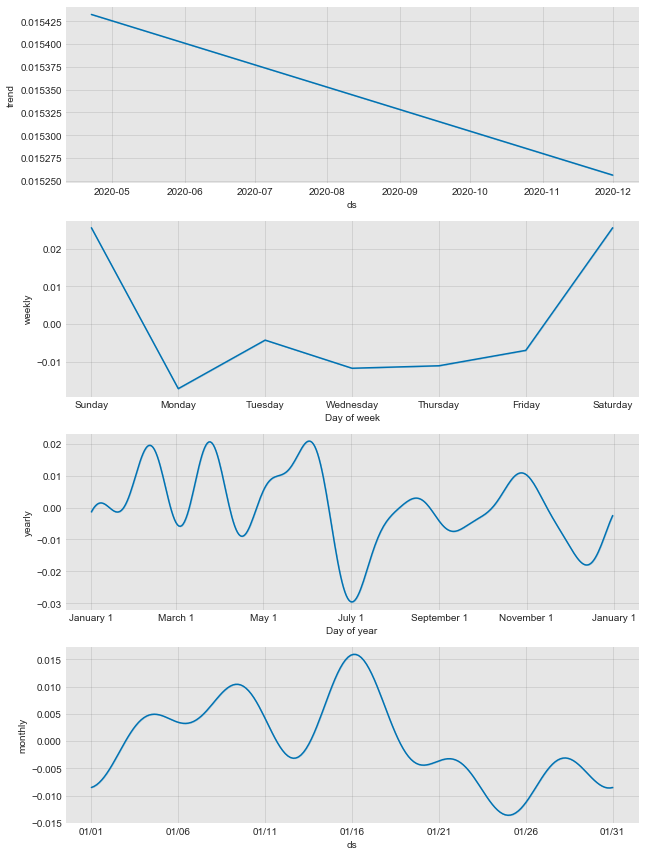

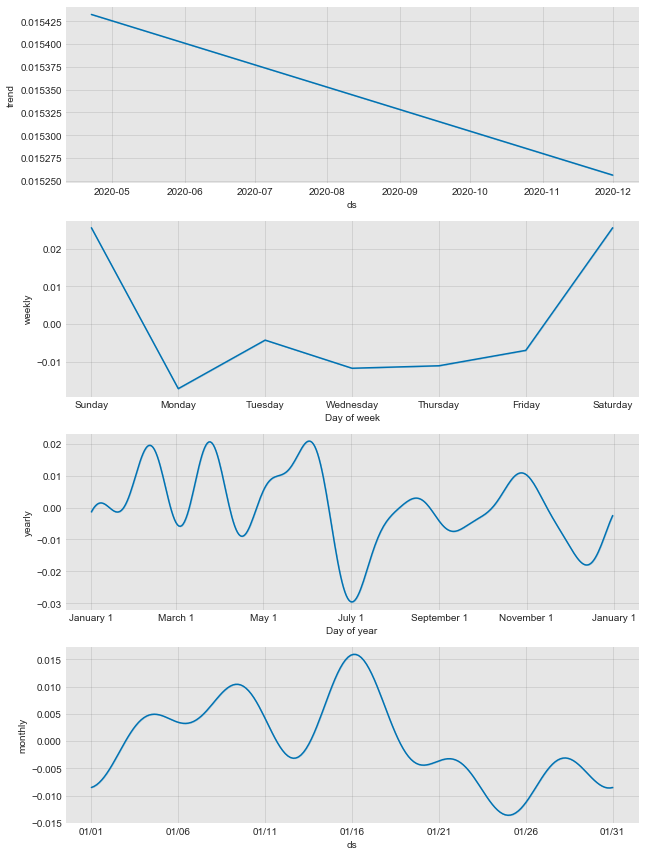

In [228]:
m.plot_components(forecast)

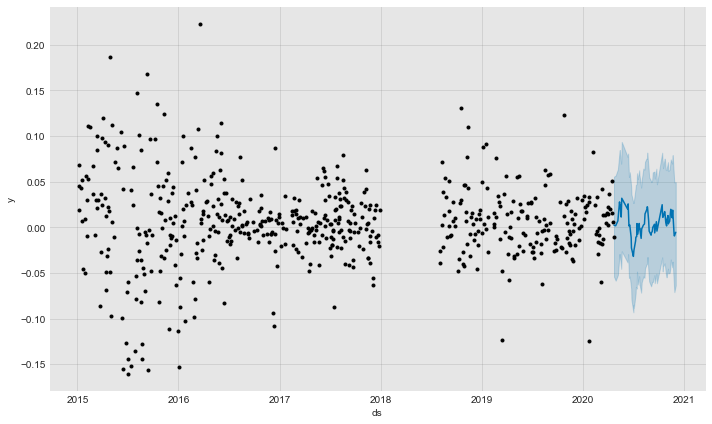

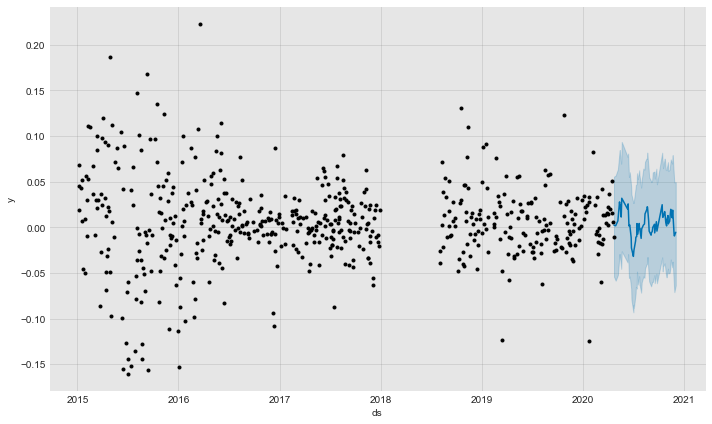

In [229]:
m.plot(forecast)

In [230]:
#Quantitative Scoring using MAPE
def MAPE(gt, pred):
    mape = []

    for g, p in zip(gt, pred):
        mape.append(max(0, 1 - abs((g-p)/g)))

    return np.mean(mape)

In [285]:
def evaluate(pred, gt, train, plot=True):

#     plt.rcParams.update({'figure.figsize': (10,10)})
#     plt.figure(figsize=(16,12))
    

    if plot:
        plt.figure()
        plt.figure(figsize=(12,8))

        temp = pd.DataFrame()
        temp[i] = pred
        temp.set_index(X_0_test.index, inplace=True)

        plt.plot(train.y[-150:])
        plt.plot(gt.y, color='green', label = 'gt')
        plt.plot(temp, color='red', label = 'pred')
        plt.legend(loc="upper left")

        plt.show()

In [231]:
MAPE(X_0_test.y, forecast.yhat)

0.21065023907116043

In [263]:
#how about all-zero prediction as well
lag = X_0_test.y.shift(1)

In [266]:
MAPE(X_0_test.y[1:], lag[1:])
# lag[1] = X_0_train.y[-1]
# evaluate(lag, X_0_test, X_0_train)

0.2345822103041799

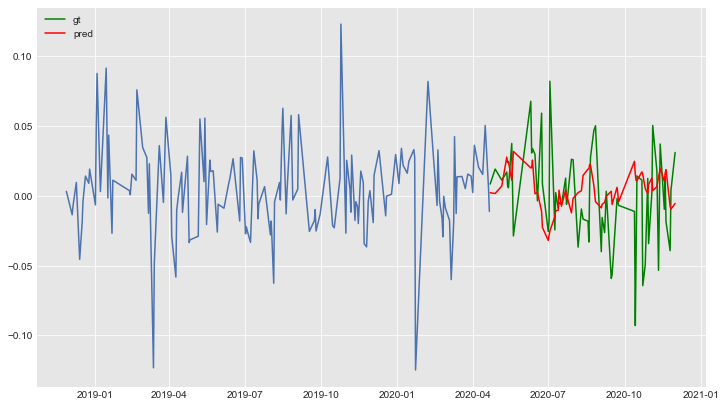

In [253]:
evaluate(forecast.yhat, X_0_test, X_0_train)

#### Auto_ARIMA

In [287]:
auto = pm.auto_arima(X_0_train.y, error_action='ignore', seasonal=True, 
                     suppress_warnings=True, m=12, trace = False)#, max_D=12)

In [288]:
auto_forecast = auto.predict(X_0_test.shape[0]).tolist()

In [289]:
MAPE(X_0_test.y, auto_forecast)

0.15441311353008488

<Figure size 432x288 with 0 Axes>

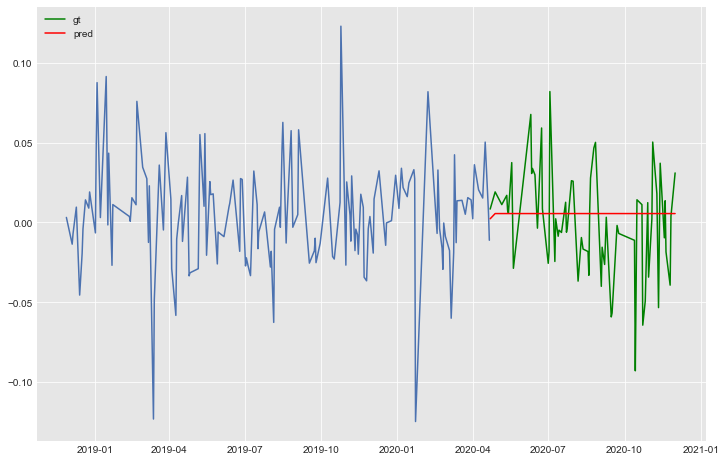

In [290]:
evaluate(auto_forecast, X_0_test, X_0_train)

### SARIMAX

In [296]:
import itertools
import statsmodels.api as sm

def best_parameters_sarimax(series, exog=None):
    '''
    Finds the best parameters for a given series for SARIMAX algorithm.
    Input: series: the series for which the parameters are to be determined.
            exog: extra features to be considered, here price increase related
    Output: the best parameters for the series and model.
    '''
    result_param = -1
    result_param_seasonal = -1
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                exog=exog,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                try:
                    if results.aic < minimum:
                        result_param = param
                        result_param_seasonal = param_seasonal
                except:
                    result_param = param
                    result_param_seasonal = param_seasonal
                    minimum = results.aic
            except:
                continue
    return result_param, result_param_seasonal


def apply_model_sarimax(series, best_param, best_param_seasonal, exog=None):
    '''
    Makes and trains SARIMAX model on the given series and parameters.
    Input:  series: series on which the model is to be trained.
            best_param, best_param_seasonal: best parameters for modelling
    Output: Trained model
    '''
    
    mod = sm.tsa.statespace.SARIMAX(series,
                                    exog=exog,
                                    order=best_param,
                                    seasonal_order=best_param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    return results

In [294]:
best_param, best_param_seasonal = best_parameters_sarimax(X_0_train.y)

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\waynn\.conda\envs\tensorflow_cpu\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [295]:
print('best params from SARIMAX:{}, seasonal: {}'.format(best_param, best_param_seasonal))

best params from SARIMAX:(1, 1, 1), seasonal: (0, 0, 0, 12)


In [297]:
results = apply_model_sarimax(X_0_train.y, best_param, best_param_seasonal)

In [303]:
srx_forecast = results.get_forecast(X_0_test.shape[0])
srx_forecast = srx_forecast.predicted_mean.tolist()

In [304]:
MAPE(X_0_test.y, srx_forecast)

0.15032446802178864

<Figure size 432x288 with 0 Axes>

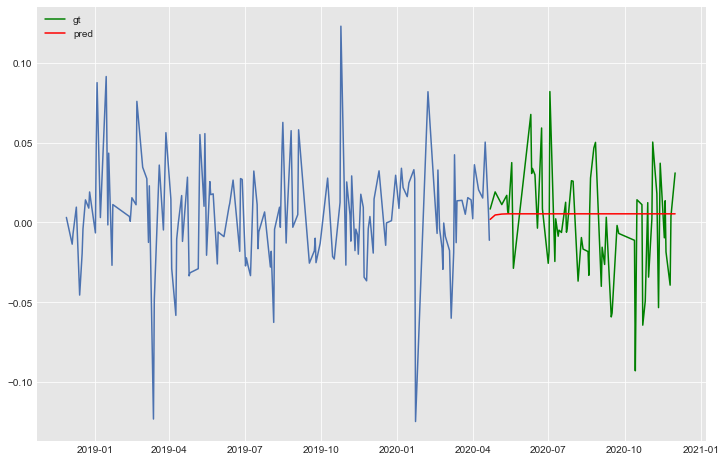

In [305]:
evaluate(srx_forecast, X_0_test, X_0_train)

#### LSTM